## TẠO LẬP MÔI TRƯỜNG

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
folder = '/content/gdrive/My Drive/'

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv(folder+'iphone_upgrade_dirty_200k.csv')

## THĂM DÒ SƠ BỘ

In [ ]:
df.shape

(200000, 21)

In [ ]:
display(df)

,respondent_id,age,gender,country,city_tier,income_usd_monthly,current_brand,device_age_months,battery_health_pct,is_storage_full,...,ad_recall,peer_upgrades_count,interest_new_model_bucket,cracked_screen,launch,expected_price_usd,trade_in_value_usd,budget_stretch_pct,most_interested_function,upgrade_within_90days
0,31070,18,Female,VN,metropolitan,1105.62,Xiaomi,102,94.0,not full,...,many,1,Pro Max,0,2017-03-11,1655.83,51.05,145.1,camera,1
1,145765,32,Male,SG,rural,8522.67,Apple,34,100.0,not full,...,never,1,Pro Max,1,2022-09-01,1335.03,397.87,11.0,camera,0
2,104273,26,Female,VN,urban,615.43,Samsung,72,97.0,not full,...,many,2,Pro Max,1,2019-02-16,1303.38,161.74,185.5,AI,1
3,188667,44,Male,IN,rural,467.28,Apple,43,95.0,not full,...,never,2,Pro Max,0,2021-09-03,1160.22,469.10,147.9,display,0
4,62829,29,Female,VN,urban,1390.84,Apple,78,100.0,not full,...,once,0,Pro Max,0,2018-10-03,1437.06,330.98,79.5,camera,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,157902,31,Female,VN,metropolitan,NaN,Apple,112,95.0,full,...,never,1,Pro Max,0,2015-09-28,1431.31,201.57,81.7,camera,1
199996,102646,27,Female,VN,urban,1235.11,Vivo,25,96.0,not full,...,never,0,Pro,0,2023-04-18,1080.50,143.12,75.9,display,0
199997,164462,28,Female,US,urban,1768.09,Apple,3,98.0,not full,...,once,0,Base,0,2025-06-02,854.70,662.85,10.9,battery,0
199998,112844,49,Male,SG,urban,3476.88,Vivo,64,93.0,full,...,never,2,Pro Max,0,2020-04-30,1459.21,63.59,40.1,zoom,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   respondent_id              200000 non-null  int64  
 1   age                        200000 non-null  int64  
 2   gender                     200000 non-null  object 
 3   country                    200000 non-null  object 
 4   city_tier                  200000 non-null  object 
 5   income_usd_monthly         196840 non-null  float64
 6   current_brand              200000 non-null  object 
 7   device_age_months          200000 non-null  int64  
 8   battery_health_pct         196862 non-null  float64
 9   is_storage_full            200000 non-null  object 
 10  ecosystem_count            200000 non-null  int64  
 11  ad_recall                  200000 non-null  object 
 12  peer_upgrades_count        200000 non-null  int64  
 13  interest_new_model_bucket  19

In [ ]:
df['respondent_id'] = df['respondent_id'].astype(object)
df['cracked_screen'] = df['cracked_screen'].astype(object)
df['upgrade_within_90days'] = df['upgrade_within_90days'].astype(object)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,200000.0,33.172600,9.442468,18.0,27.0000,33.000,39.00,100.0
income_usd_monthly,196840.0,3333.364152,3241.069544,50.0,1026.6900,2271.775,4788.77,35000.0
device_age_months,200000.0,59.790805,37.627435,0.0,26.0000,59.000,93.00,150.0
battery_health_pct,196862.0,96.817425,3.330598,55.0,95.0000,97.000,99.00,105.0
ecosystem_count,200000.0,1.117580,1.138434,0.0,0.0000,1.000,2.00,5.0
peer_upgrades_count,200000.0,1.353525,1.210943,0.0,0.0000,1.000,2.00,11.0
expected_price_usd,196706.0,1314.059193,201.605388,50.0,1237.5725,1346.245,1436.22,2500.0
trade_in_value_usd,196819.0,279.572826,193.571468,-50.0,139.3800,235.850,387.40,2000.0
budget_stretch_pct,196834.0,72.241962,75.957402,-10.0,20.0000,42.700,102.70,600.0


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
respondent_id,200000,192000,150316,2
gender,200000,11,Female,94589
country,200000,41,VN,66086
city_tier,200000,3,metropolitan,89859
current_brand,200000,7,Apple,88370
is_storage_full,200000,9,not full,148471
ad_recall,200000,3,once,78382
interest_new_model_bucket,198020,3,Pro Max,162233
cracked_screen,200000,2,0,153191
launch,200000,5933,2025-06-02,8766


/tmp/ipython-input-3686075776.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([num[c].dropna() for c in num], labels=num.columns)


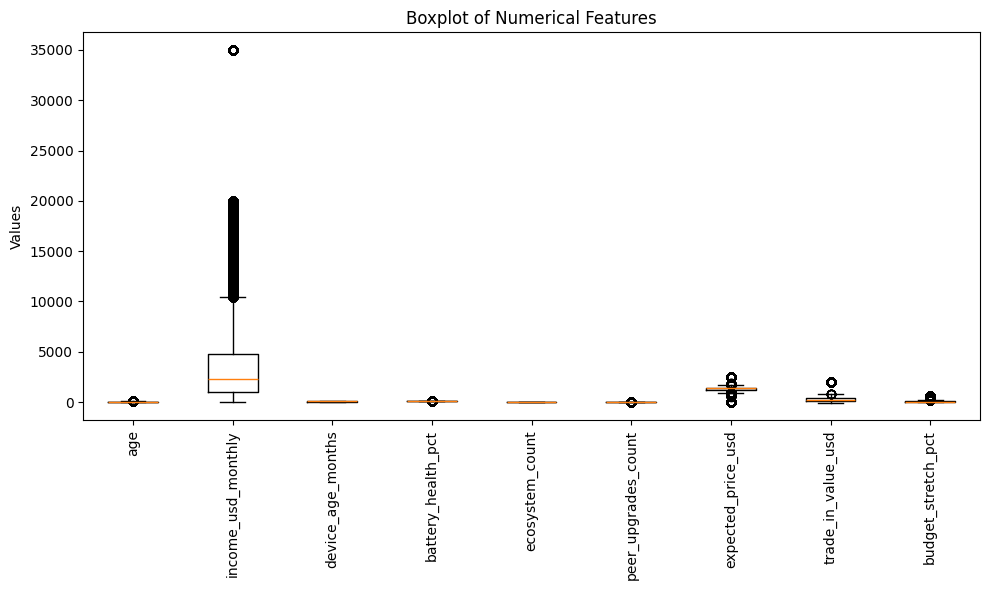

In [ ]:
num = df.select_dtypes(include='number')
plt.figure(figsize=(10,6))
plt.boxplot([num[c].dropna() for c in num], labels=num.columns)
plt.xticks(rotation=90); plt.title("Boxplot of Numerical Features")
plt.ylabel("Values")
plt.tight_layout()
plt.show()

In [ ]:
display(df.isnull().sum())

,0
respondent_id,0
age,0
gender,0
country,0
city_tier,0
income_usd_monthly,3160
current_brand,0
device_age_months,0
battery_health_pct,3138
is_storage_full,0


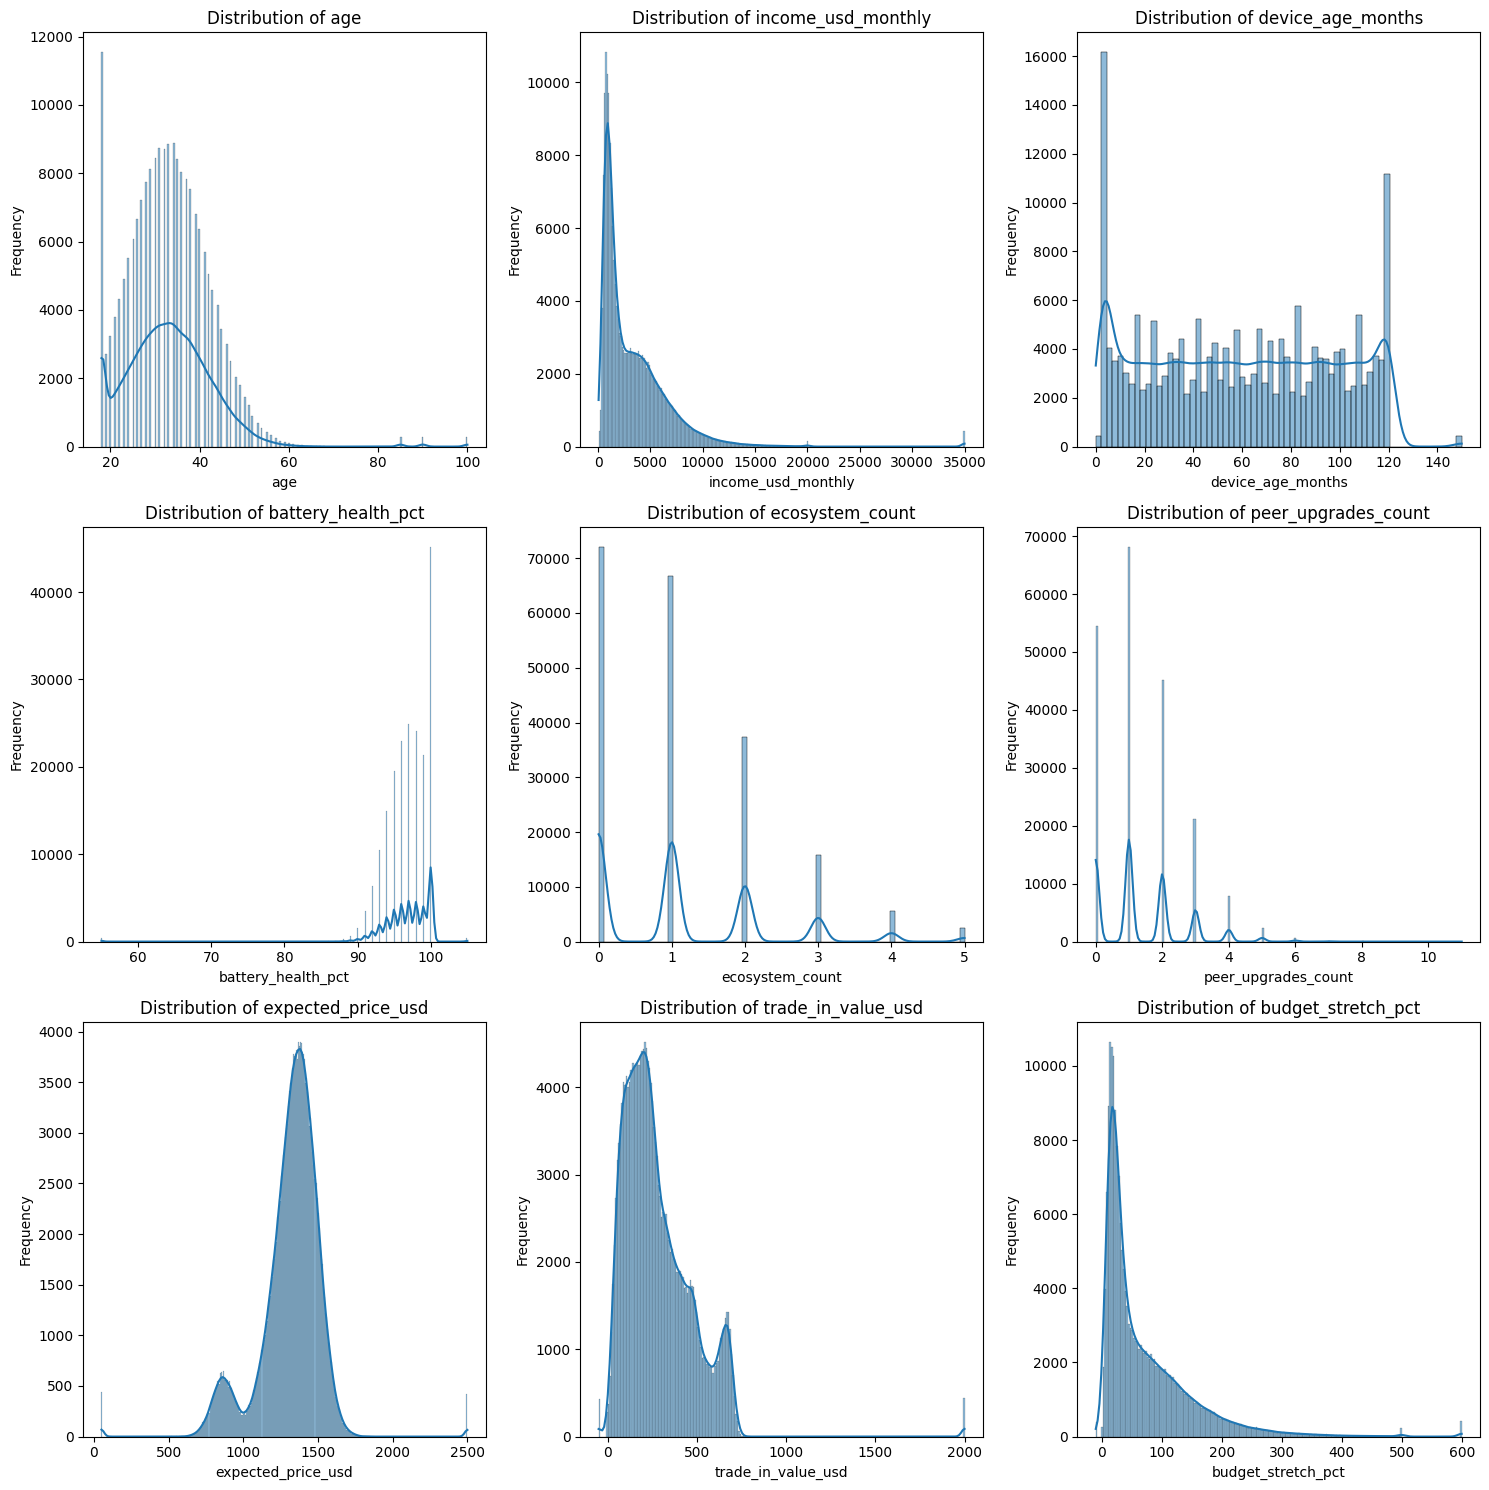

In [ ]:
cols = list(num)
n_cols = 3
n_rows = -(-len(cols) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.ravel()

for ax, col in zip(axes, cols):
    sns.histplot(df[col].dropna(), kde=True, ax=ax)
    ax.set(title=f'Distribution of {col}', xlabel=col, ylabel='Frequency')
plt.tight_layout()
plt.show()

## REMOVE DUPLICATE

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Số dòng bị trùng lặp:", duplicate_rows)
df = df.drop_duplicates(subset=df.columns.tolist())

Số dòng bị trùng lặp: 8000


## CHUẨN HÓA TUỔI

In [ ]:
low_cap = df["age"].quantile(0.01)
high_cap = df["age"].quantile(0.99)

df["age"] = df["age"].clip(lower=low_cap, upper=high_cap)


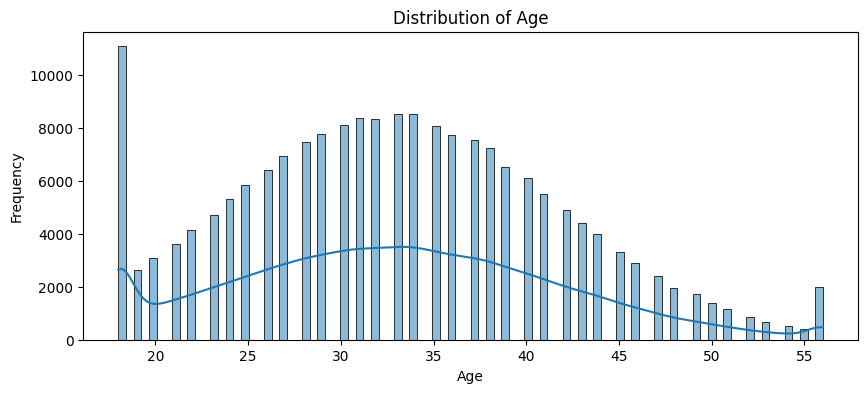

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## CHUẨN HÓA GIỚI TÍNH

In [ ]:
df["gender"] = df["gender"].astype(str).str.strip().str.lower()
df["gender"] = df["gender"].replace({"femlae": "female"})
df = df[df["gender"] != "other"]

## CHUẨN HÓA country

In [ ]:
df["country"] = df["country"].astype(str).str.strip().str.lower()
df["country"] = df["country"].replace({"othr":"other"})

## CHUẨN HÓA income_usd_monthly

In [ ]:
low_cap = df["income_usd_monthly"].quantile(0.01)
high_cap = df["income_usd_monthly"].quantile(0.99)

df["income_usd_monthly"] = df["income_usd_monthly"].clip(lower=low_cap, upper=high_cap)

## CHUẨN HÓA battery_health_pct_clean

In [ ]:
df["battery_health_pct"] = df["battery_health_pct"].clip(upper=100)

## Chuẩn hóa is_storage_full

In [ ]:
df["is_storage_full"] = (df["is_storage_full"].astype(str).str.strip().str.lower())
df["is_storage_full"] = df["is_storage_full"].replace({"false": "not full","true":"full","1":"full","0":"not full"})


## Chuẩn hóa budget_stretch_pct

In [ ]:
low_cap = df["budget_stretch_pct"].quantile(0.01)
high_cap = df["budget_stretch_pct"].quantile(0.99)

df["budget_stretch_pct"] = df["budget_stretch_pct"].clip(lower=low_cap, upper=high_cap)

## CHUẨN HÓA expected_price_usd

In [ ]:
Q1 = df["expected_price_usd"].quantile(0.25)
Q3 = df["expected_price_usd"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df["expected_price_usd"] = df["expected_price_usd"].clip(lower=lower_bound, upper=upper_bound)

## CHUẨN HÓA most_interested_function VÀ interest_new_model_bucket

In [ ]:
df["most_interested_function"] = df["most_interested_function"].astype(str).str.strip().str.lower()
df["most_interested_function"] = df["most_interested_function"].replace({"caméra": "camera","batery":"battery"})
df["interest_new_model_bucket"] = df["interest_new_model_bucket"].astype(str).str.strip()

## Chuẩn hóa trade_in_value_usd

In [ ]:
low_cap = df["trade_in_value_usd"].quantile(0.01)
high_cap = df["trade_in_value_usd"].quantile(0.99)

df["trade_in_value_usd"] = df["trade_in_value_usd"].clip(lower=low_cap, upper=high_cap)

## CHuẩn hóa launch

In [ ]:
df["launch"] = pd.to_datetime(df["launch"], errors="coerce")
df= df[~df["launch"].isna()]

## Chuẩn hóa peer_upgrades_count

In [ ]:
low_cap = df["peer_upgrades_count"].quantile(0.01)
high_cap = df["peer_upgrades_count"].quantile(0.99)

df["peer_upgrades_count"] = df["peer_upgrades_count"].clip(lower=low_cap, upper=high_cap)

## CHuẩn hóa device_age_months

In [ ]:
low_cap = df["device_age_months"].quantile(0.01)
high_cap = df["device_age_months"].quantile(0.99)

df["device_age_months"] = df["device_age_months"].clip(lower=low_cap, upper=high_cap)

## Chuẩn hóa battery_health_pct

In [ ]:
Q1 = df["battery_health_pct"].quantile(0.25)
Q3 = df["battery_health_pct"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df["battery_health_pct"] = df["battery_health_pct"].clip(lower=lower_bound, upper=upper_bound)

## FILL MISSING VALUE

In [ ]:
for col in [
    "income_usd_monthly",
    "battery_health_pct",
    "expected_price_usd",
    "trade_in_value_usd",
    "budget_stretch_pct"
]:
    df[col] = df[col].fillna(df[col].median())

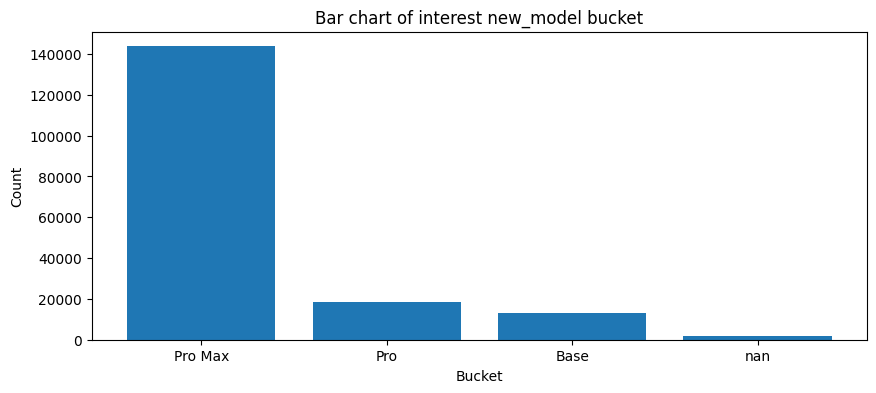

In [ ]:
plt.figure(figsize=(10, 4))
plt.bar(df["interest_new_model_bucket"].value_counts().index, df["interest_new_model_bucket"].value_counts().values)
plt.title("Bar chart of interest new_model bucket")
plt.xlabel("Bucket")
plt.ylabel("Count")
plt.show()

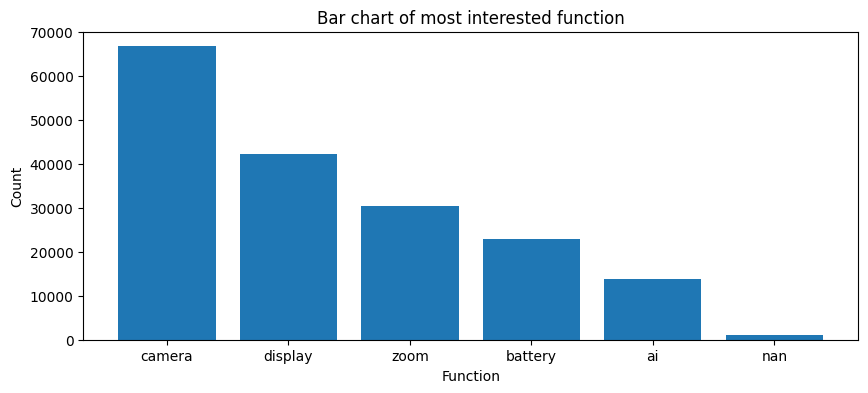

In [ ]:
plt.figure(figsize=(10, 4))
plt.bar(df["most_interested_function"].value_counts().index, df["most_interested_function"].value_counts().values)
plt.title("Bar chart of most interested function")
plt.xlabel("Function")
plt.ylabel("Count")
plt.show()

In [ ]:
for col in [
  "interest_new_model_bucket",
  "most_interested_function"
]:
    df[col] = df[col].fillna(df[col].mode())

In [ ]:
display(df.isnull().sum())

,0
respondent_id,0
age,0
gender,0
country,0
city_tier,0
income_usd_monthly,0
current_brand,0
device_age_months,0
battery_health_pct,0
is_storage_full,0


## KIỂM TRA DỮ LIỆU SAU CHUẨN HÓA

/tmp/ipython-input-1723129163.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


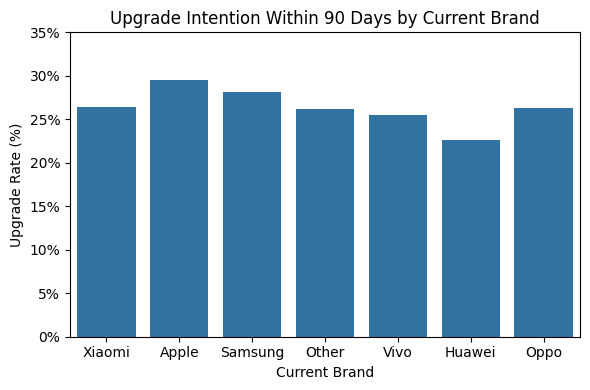

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=df,
    x='current_brand',
    y='upgrade_within_90days',
    estimator=np.mean,
    ci=None # <-- tắt error bars
)

plt.title("Upgrade Intention Within 90 Days by Current Brand")
plt.xlabel("Current Brand")
plt.ylabel("Upgrade Rate (%)")

# Format y-axis as %
yticks = plt.yticks()[0]
plt.yticks(yticks, ['{:.0%}'.format(y) for y in yticks])

plt.tight_layout()
plt.savefig("upgrade_by_brand_no_errorbars.png", dpi=300)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177076 entries, 0 to 199999
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   respondent_id              177076 non-null  object        
 1   age                        177076 non-null  int64         
 2   gender                     177076 non-null  object        
 3   country                    177076 non-null  object        
 4   city_tier                  177076 non-null  object        
 5   income_usd_monthly         177076 non-null  float64       
 6   current_brand              177076 non-null  object        
 7   device_age_months          177076 non-null  int64         
 8   battery_health_pct         177076 non-null  float64       
 9   is_storage_full            177076 non-null  object        
 10  ecosystem_count            177076 non-null  int64         
 11  ad_recall                  177076 non-null  object       

In [ ]:
for col in df:
    print(col)
    print("dtype:", df[col].dtype)
    print("unique count:", df[col].nunique(dropna=False))
    print(df[col].value_counts(dropna=False).head(10))
    print()

respondent_id
dtype: object
unique count: 177076
respondent_id
71414     1
31070     1
145765    1
104273    1
174424    1
37932     1
83553     1
129620    1
111390    1
111280    1
Name: count, dtype: int64

age
dtype: int64
unique count: 39
age
18    10221
33     7899
34     7892
31     7689
32     7684
30     7511
35     7461
29     7161
36     7102
37     6956
Name: count, dtype: int64

gender
dtype: object
unique count: 2
gender
female    88914
male      88162
Name: count, dtype: int64

country
dtype: object
unique count: 10
country
vn       59251
us       34015
sg       17285
other    17118
in       13633
jp       10146
kr        8476
au        6896
de        5223
uk        5033
Name: count, dtype: int64

city_tier
dtype: object
unique count: 3
city_tier
metropolitan    79556
urban           70836
rural           26684
Name: count, dtype: int64

income_usd_monthly
dtype: float64
unique count: 147131
income_usd_monthly
2270.3150     2804
13481.3440    1751
336.2536      1748
609.

In [ ]:
display(df.isnull().sum())

,0
respondent_id,0
age,0
gender,0
country,0
city_tier,0
income_usd_monthly,0
current_brand,0
device_age_months,0
battery_health_pct,0
is_storage_full,0


In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
age,177076.0,33.010126,18.0,27.0,33.0,39.0,56.0,8.712929
income_usd_monthly,177076.0,3250.637739,336.2536,1037.1725,2270.315,4748.3375,13481.344,2813.041615
device_age_months,177076.0,59.752513,3.0,27.0,59.0,93.0,120.0,37.467896
battery_health_pct,177076.0,96.888059,89.0,95.0,97.0,99.0,100.0,2.629215
ecosystem_count,177076.0,1.117498,0.0,0.0,1.0,2.0,5.0,1.13781
peer_upgrades_count,177076.0,1.34684,0.0,0.0,1.0,2.0,5.0,1.189338
launch,177076,2020-06-07 19:10:48.860376320,2015-02-05 00:00:00,2017-09-16 00:00:00,2020-06-18 00:00:00,2023-03-05 00:00:00,2025-06-17 00:00:00,NaN
expected_price_usd,177076.0,1321.832134,939.87,1240.4,1346.38,1434.52,1734.27,167.46625
trade_in_value_usd,177076.0,276.093439,19.66,140.75,235.895,384.0025,700.73,174.813568
budget_stretch_pct,177076.0,70.803078,3.5,20.2,42.7,101.6,347.4,70.089589


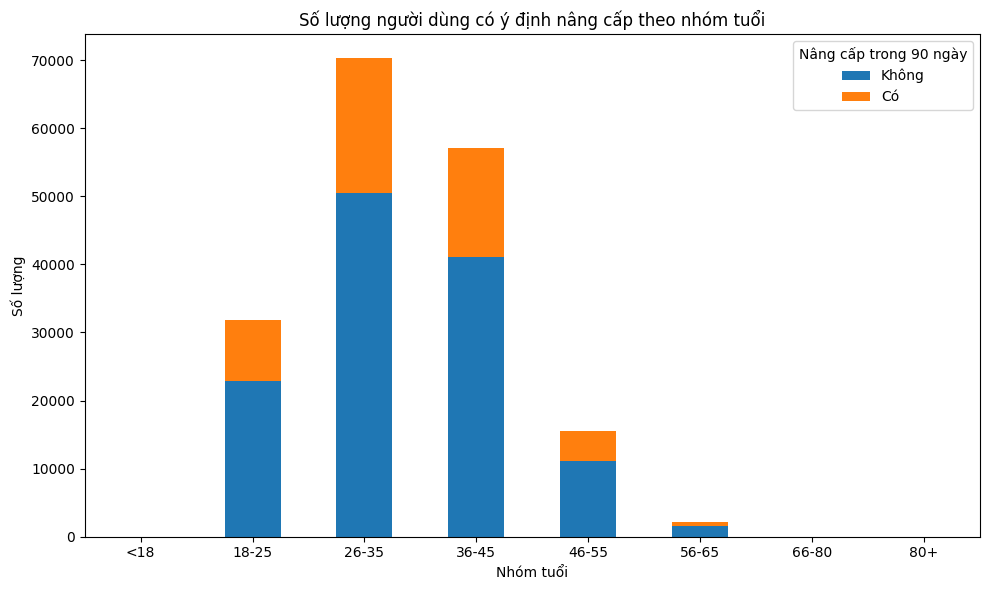

In [ ]:
bins = [0, 18, 25, 35, 45, 55, 65, 80, 100]
labels = ["<18", "18-25", "26-35", "36-45", "46-55", "56-65", "66-80", "80+"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)
age_upgrade_counts = df.groupby(['age_group', 'upgrade_within_90days'], observed=False).size().unstack(fill_value=0)

age_upgrade_counts.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Số lượng người dùng có ý định nâng cấp theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.legend(title='Nâng cấp trong 90 ngày', labels=['Không', 'Có'])
plt.tight_layout()
plt.show()

/tmp/ipython-input-3838097757.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['upgrade_within_90days']


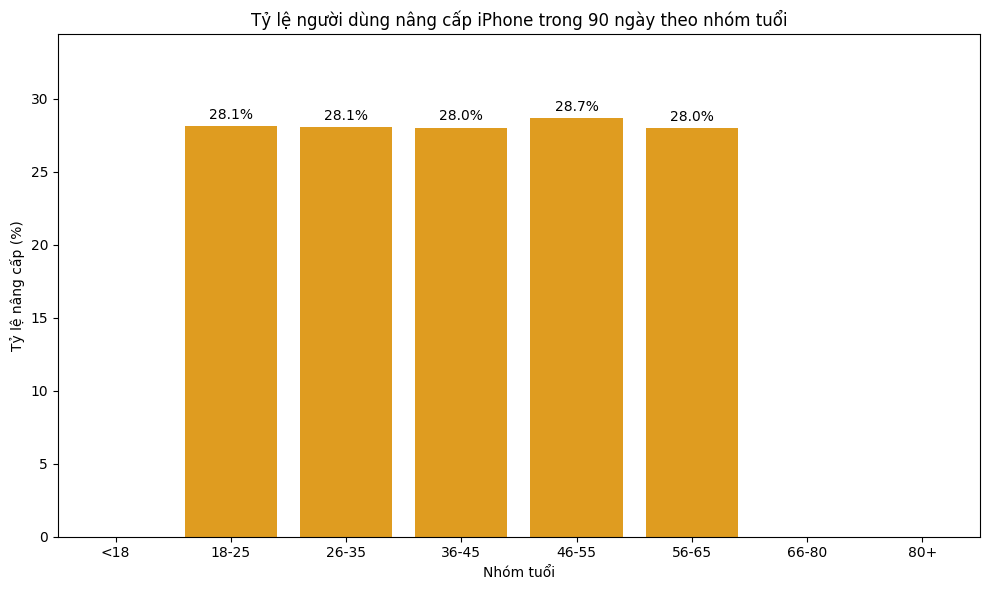

In [ ]:
age_upgrade_rate = (
    df.groupby('age_group')['upgrade_within_90days']
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
)


plt.figure(figsize=(10,6))
sns.barplot(data=age_upgrade_rate, x='age_group', y='upgrade_within_90days', color='orange')


for i, val in enumerate(age_upgrade_rate['upgrade_within_90days']):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center', fontsize=10)

plt.title('Tỷ lệ người dùng nâng cấp iPhone trong 90 ngày theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Tỷ lệ nâng cấp (%)')
plt.xticks(rotation=0)
plt.ylim(0, age_upgrade_rate['upgrade_within_90days'].max() * 1.2)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2621246727.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_upgrade_rate, x="gender", y="upgrade_within_90days",


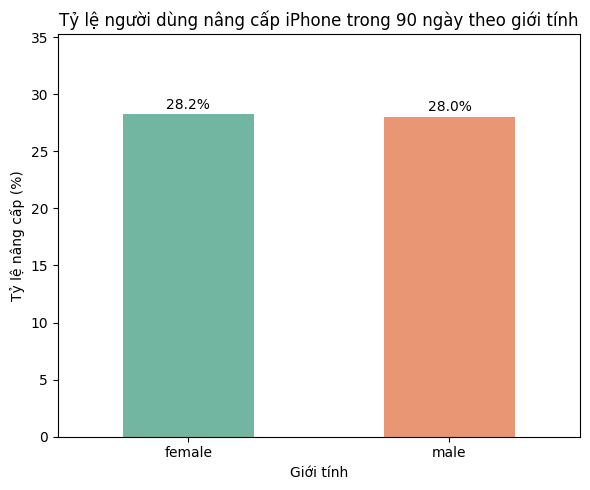

In [ ]:
gender_upgrade_rate = (
    df.groupby("gender")["upgrade_within_90days"]
    .mean()
    .mul(100)        # đổi sang %
    .round(2)
    .reset_index()
)


plt.figure(figsize=(6,5))
sns.barplot(data=gender_upgrade_rate, x="gender", y="upgrade_within_90days",
            palette="Set2", width=0.5)


for i, val in enumerate(gender_upgrade_rate["upgrade_within_90days"]):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center', fontsize=10)


plt.title("Tỷ lệ người dùng nâng cấp iPhone trong 90 ngày theo giới tính")
plt.xlabel("Giới tính")
plt.ylabel("Tỷ lệ nâng cấp (%)")
plt.ylim(0, gender_upgrade_rate["upgrade_within_90days"].max() * 1.25)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3144471905.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="city_tier", y="income_usd_monthly", palette="viridis")


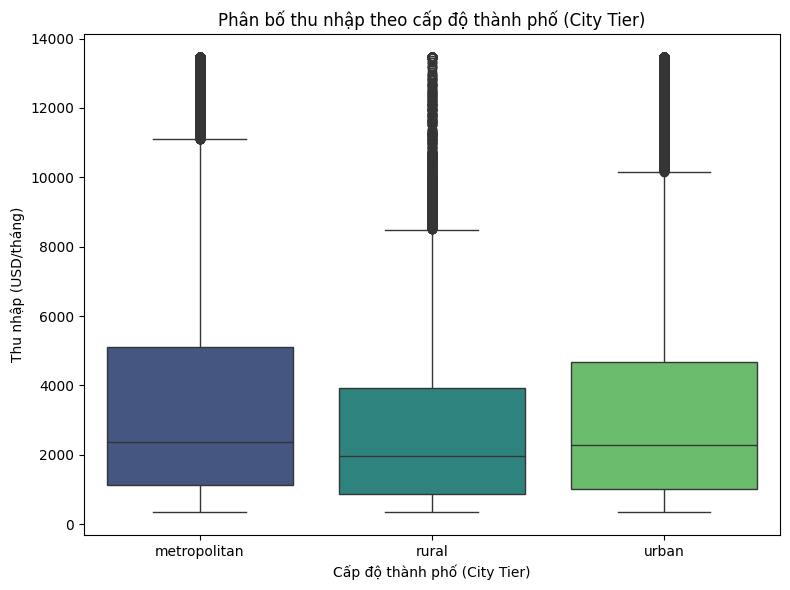

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="city_tier", y="income_usd_monthly", palette="viridis")
plt.title("Phân bố thu nhập theo cấp độ thành phố (City Tier)")
plt.xlabel("Cấp độ thành phố (City Tier)")
plt.ylabel("Thu nhập (USD/tháng)")
plt.tight_layout()
plt.show()

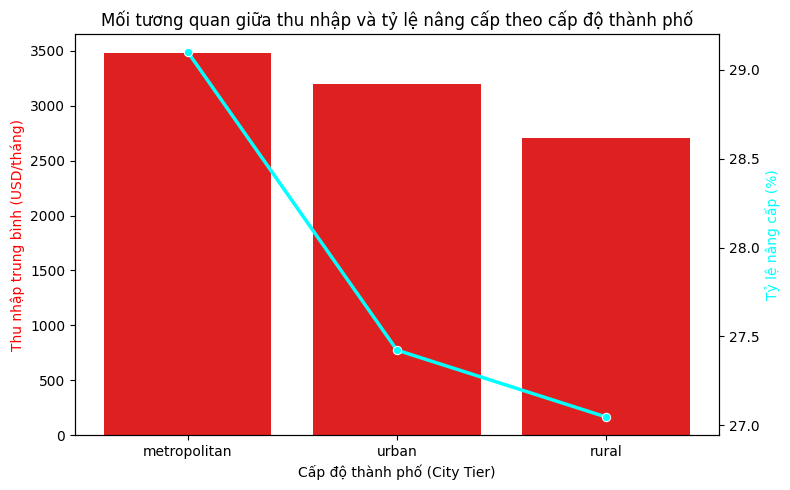

In [ ]:
city_summary = (
    df.groupby("city_tier")[["income_usd_monthly", "upgrade_within_90days"]]
    .agg({"income_usd_monthly": "mean", "upgrade_within_90days": "mean"})
    .reset_index()
)

city_summary["upgrade_within_90days"] = city_summary["upgrade_within_90days"] * 100
city_summary = city_summary.sort_values("income_usd_monthly", ascending=False) #sắp xếp


color1, color2 = "red", "cyan"

fig, ax1 = plt.subplots(figsize=(8,5))


sns.barplot(data=city_summary, x="city_tier", y="income_usd_monthly", color=color1, ax=ax1)
ax1.set_ylabel("Thu nhập trung bình (USD/tháng)", color=color1)
ax1.set_xlabel("Cấp độ thành phố (City Tier)")


ax2 = ax1.twinx()
sns.lineplot(data=city_summary, x="city_tier", y="upgrade_within_90days",
             color=color2, marker="o", linewidth=2.5, ax=ax2)
ax2.set_ylabel("Tỷ lệ nâng cấp (%)", color=color2)

plt.title("Mối tương quan giữa thu nhập và tỷ lệ nâng cấp theo cấp độ thành phố")
plt.tight_layout()
plt.show()

/tmp/ipython-input-884835790.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("device_age_group")["upgrade_within_90days"]


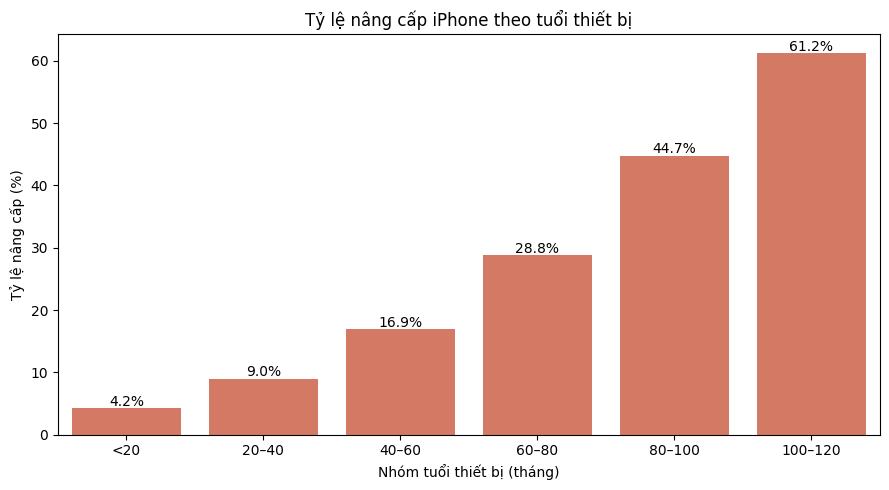

In [ ]:
bins = [0, 20, 40, 60, 80, 100, 120]
labels = ["<20", "20–40", "40–60", "60–80", "80–100", "100–120"]

df["device_age_group"] = pd.cut(df["device_age_months"],
                                bins=bins,
                                labels=labels,
                                right=False)   # [0,20), [20,40), ...

# tính tỷ lệ nâng cấp theo nhóm tuổi
upgrade_rate = (
    df.groupby("device_age_group")["upgrade_within_90days"]
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

plt.figure(figsize=(9,5))
sns.barplot(data=upgrade_rate, x="device_age_group", y="upgrade_within_90days", color="#e76f51")

for i, val in enumerate(upgrade_rate["upgrade_within_90days"]):
    plt.text(i, val + 0.4, f"{val:.1f}%", ha='center', fontsize=10)

plt.title("Tỷ lệ nâng cấp iPhone theo tuổi thiết bị")
plt.xlabel("Nhóm tuổi thiết bị (tháng)")
plt.ylabel("Tỷ lệ nâng cấp (%)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-776988697.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("battery_group")["upgrade_within_90days"]


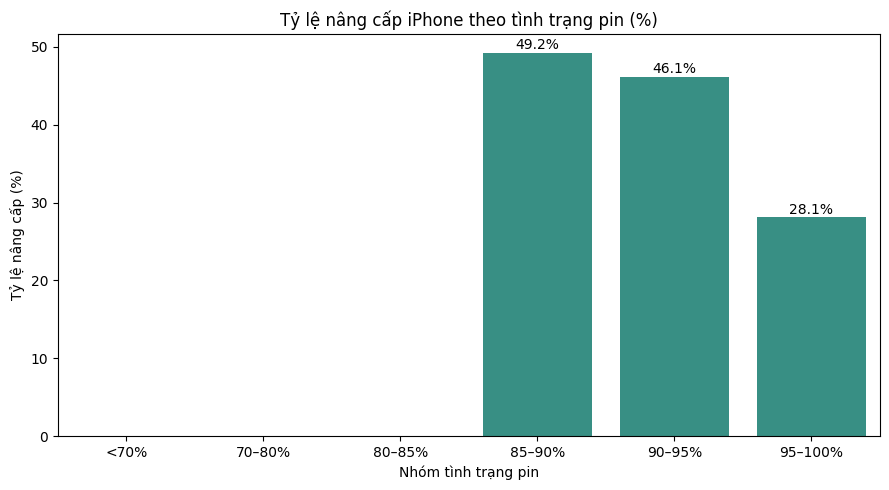

In [ ]:
# Chia nhóm tuổi thọ pin
bins = [0, 70, 80, 85, 90, 95, 100]
labels = ["<70%", "70–80%", "80–85%", "85–90%", "90–95%", "95–100%"]

df["battery_group"] = pd.cut(df["battery_health_pct"], bins=bins, labels=labels, right=False)

# Tính tỷ lệ nâng cấp
upgrade_by_battery = (
    df.groupby("battery_group")["upgrade_within_90days"]
      .mean()
      .mul(100)
      .round(2)
      .reset_index()
)

# Vẽ biểu đồ
plt.figure(figsize=(9,5))
sns.barplot(data=upgrade_by_battery, x="battery_group", y="upgrade_within_90days", color="#2a9d8f")

# Hiển thị nhãn %
for i, val in enumerate(upgrade_by_battery["upgrade_within_90days"]):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center', fontsize=10)

plt.title("Tỷ lệ nâng cấp iPhone theo tình trạng pin (%)")
plt.xlabel("Nhóm tình trạng pin")
plt.ylabel("Tỷ lệ nâng cấp (%)")
plt.tight_layout()
plt.show()

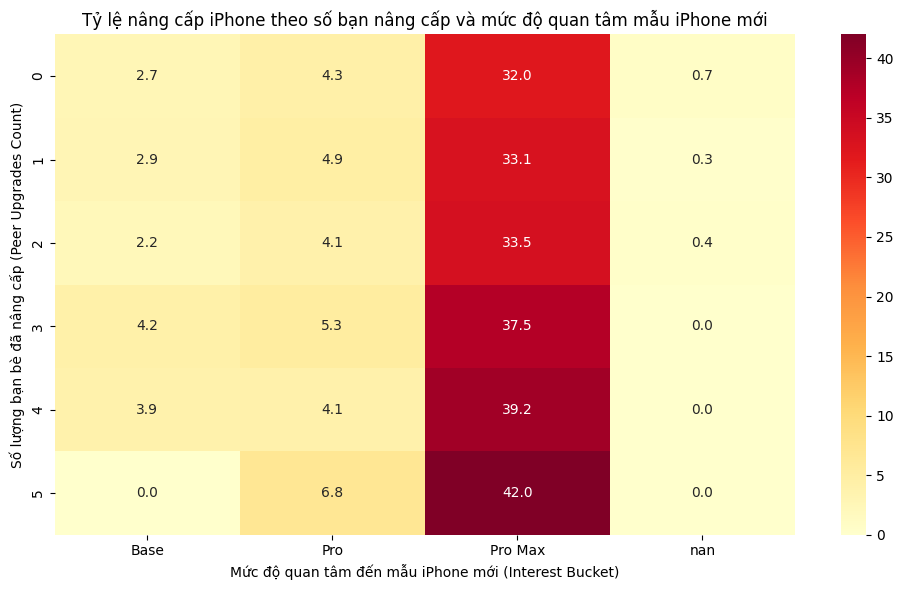

In [ ]:
# Tạo bảng tần suất theo peer_upgrades_count × interest_new_model_bucket × hành vi nâng cấp
pivot = (
    df.groupby(["peer_upgrades_count", "interest_new_model_bucket", "upgrade_within_90days"])
      .size()
      .reset_index(name="count")
)

# Chuyển định dạng để mỗi trạng thái nâng cấp là một cột
pivot_table = pivot.pivot_table(
    index=["peer_upgrades_count", "interest_new_model_bucket"],
    columns="upgrade_within_90days",
    values="count",
    fill_value=0
)

# Đặt tên cột cho rõ ràng
pivot_table.columns = ["Không nâng cấp", "Có nâng cấp"]

# Tính tổng và tỷ lệ nâng cấp theo từng ô
pivot_table["Tổng"] = pivot_table["Không nâng cấp"] + pivot_table["Có nâng cấp"]
pivot_table["Tỷ lệ nâng cấp (%)"] = (pivot_table["Có nâng cấp"] / pivot_table["Tổng"] * 100).round(1)

# Pivot lần nữa để trực quan hóa heatmap tỷ lệ nâng cấp
heatmap_data = pivot_table["Tỷ lệ nâng cấp (%)"].unstack(level=1)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap="YlOrRd", fmt=".1f")
plt.title("Tỷ lệ nâng cấp iPhone theo số bạn nâng cấp và mức độ quan tâm mẫu iPhone mới")
plt.xlabel("Mức độ quan tâm đến mẫu iPhone mới (Interest Bucket)")
plt.ylabel("Số lượng bạn bè đã nâng cấp (Peer Upgrades Count)")
plt.tight_layout()
plt.show()

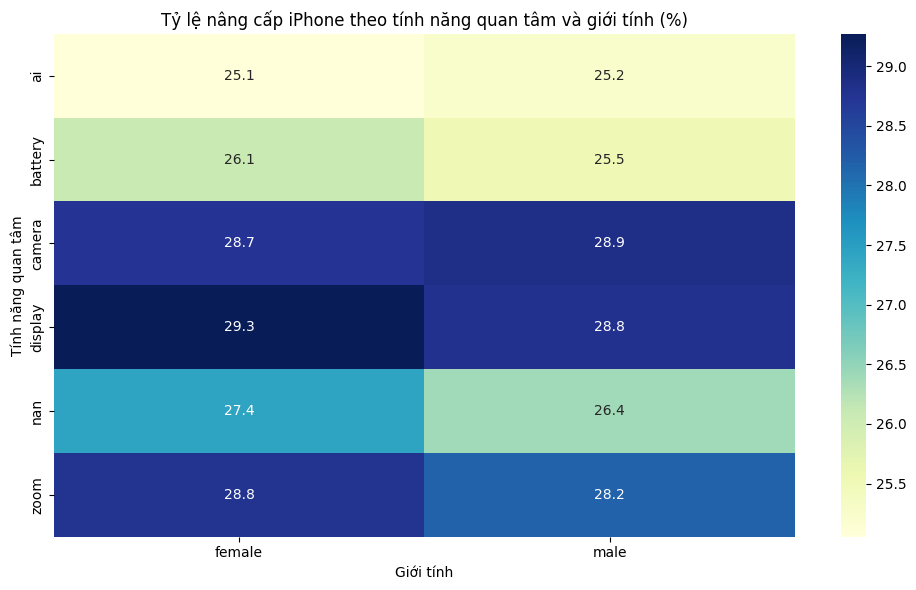

In [ ]:
pivot = df.pivot_table(
    values="upgrade_within_90days",
    index="most_interested_function",
    columns="gender",
    aggfunc="mean"
).mul(100)

pivot = pivot.astype(float)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Tỷ lệ nâng cấp iPhone theo tính năng quan tâm và giới tính (%)")
plt.xlabel("Giới tính")
plt.ylabel("Tính năng quan tâm")
plt.tight_layout()
plt.show()

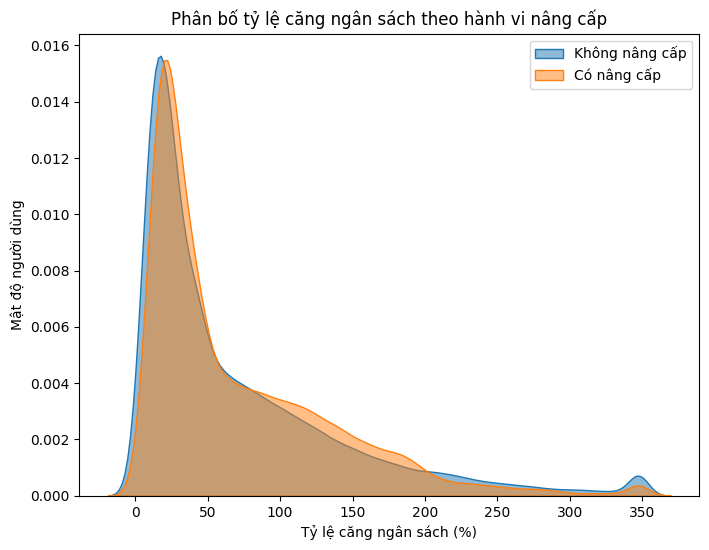

In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df[df['upgrade_within_90days']==0]['budget_stretch_pct'], label='Không nâng cấp', fill=True, alpha=0.5)
sns.kdeplot(data=df[df['upgrade_within_90days']==1]['budget_stretch_pct'], label='Có nâng cấp', fill=True, alpha=0.5)
plt.title('Phân bố tỷ lệ căng ngân sách theo hành vi nâng cấp')
plt.xlabel('Tỷ lệ căng ngân sách (%)')
plt.ylabel('Mật độ người dùng')
plt.legend()
plt.show()

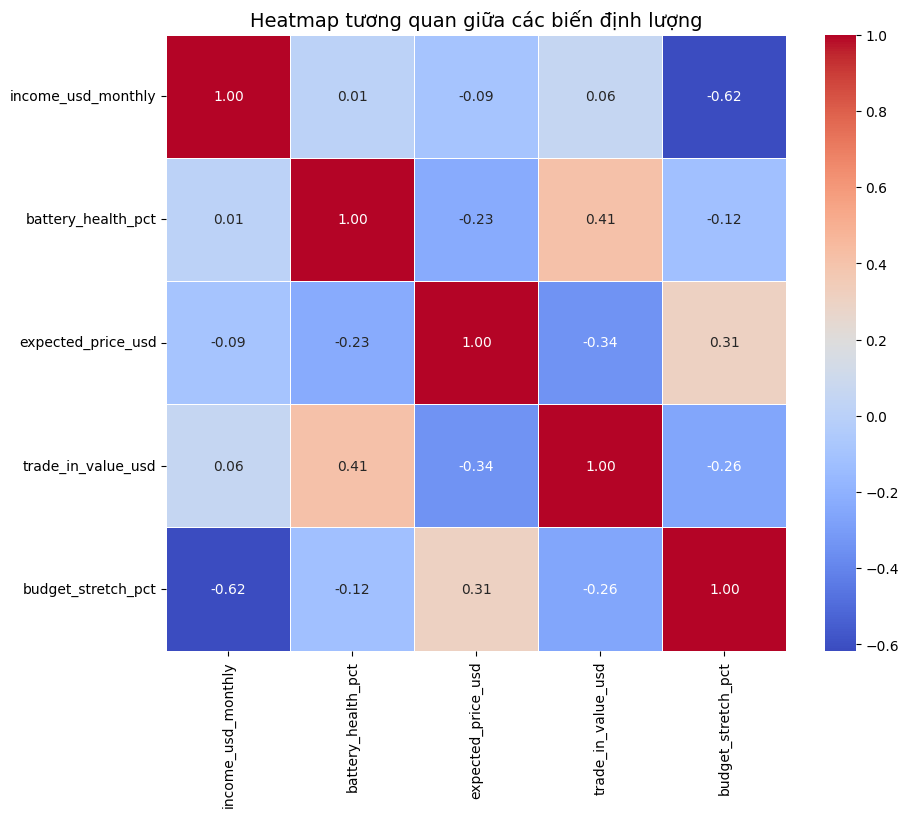

In [ ]:
# Lọc ra các cột định lượng (numeric)
numeric_df = df.select_dtypes(include=['float64'])

# Tính ma trận tương quan
corr_matrix = numeric_df.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap tương quan giữa các biến định lượng', fontsize=14)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

=== Classification report ===
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     25457
           1       0.62      0.49      0.55      9959

    accuracy                           0.77     35416
   macro avg       0.72      0.69      0.70     35416
weighted avg       0.76      0.77      0.76     35416

=== Confusion matrix ===
[[22475  2982]
 [ 5098  4861]]
=== Hệ số và Odds Ratio ===
              feature  coefficient  odds_ratio
1   device_age_months     1.342156       3.827
3  expected_price_usd     0.078357       1.082
2  trade_in_value_usd     0.040939       1.042
0  income_usd_monthly    -0.043720       0.957
4  budget_stretch_pct    -0.258450       0.772


/tmp/ipython-input-2681852286.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="coefficient", y="feature", palette="coolwarm")


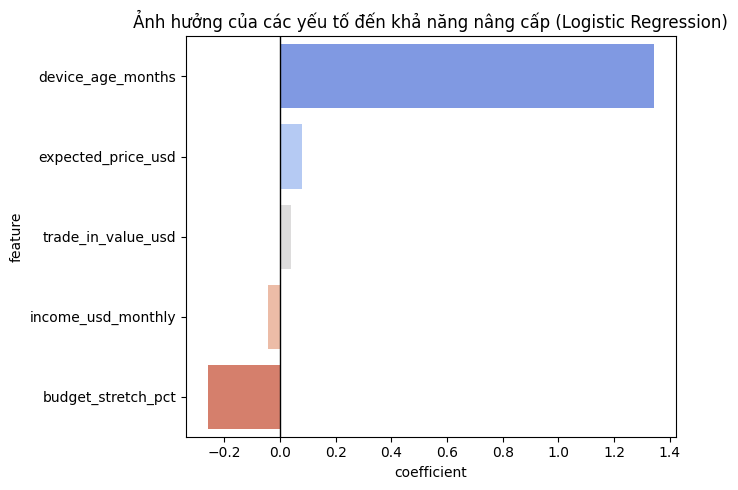

In [ ]:
feature_cols = [
    "income_usd_monthly",
    "device_age_months",
    "trade_in_value_usd",
    "expected_price_usd",
    "budget_stretch_pct"
]
target_col = "upgrade_within_90days"

# 3. Làm sạch biến mục tiêu: chỉ giữ 0 và 1
# (phòng khi trong file có NaN hoặc giá trị khác)
df = df[df[target_col].isin([0, 1])].copy()
# 5. Tách X, y
X = df[feature_cols]
y = df[target_col].astype(int)   # ép về int để chắc chắn là nhãn phân loại

# 6. Chia train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # giữ tỉ lệ 0/1 giống nhau ở train và test
)

# 7. Chuẩn hoá dữ liệu (rất quan trọng cho Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Khởi tạo và huấn luyện mô hình Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# 9. Đánh giá mô hình
y_pred = model.predict(X_test_scaled)
print("=== Classification report ===")
print(classification_report(y_test, y_pred))

print("=== Confusion matrix ===")
print(confusion_matrix(y_test, y_pred))

# 9. Hệ số và Odds Ratio
coef_df = pd.DataFrame({
    "feature": feature_cols,
    "coefficient": model.coef_[0]
}).sort_values("coefficient", ascending=False)

# Tính Odds Ratio (e^β)
coef_df["odds_ratio"] = np.exp(coef_df["coefficient"]).round(3)

print("=== Hệ số và Odds Ratio ===")
print(coef_df)

# 10. Biểu đồ thể hiện mức ảnh hưởng
plt.figure(figsize=(7,5))
sns.barplot(data=coef_df, x="coefficient", y="feature", palette="coolwarm")
plt.title("Ảnh hưởng của các yếu tố đến khả năng nâng cấp (Logistic Regression)")
plt.axvline(0, color="black", linewidth=1)
plt.tight_layout()
plt.show()

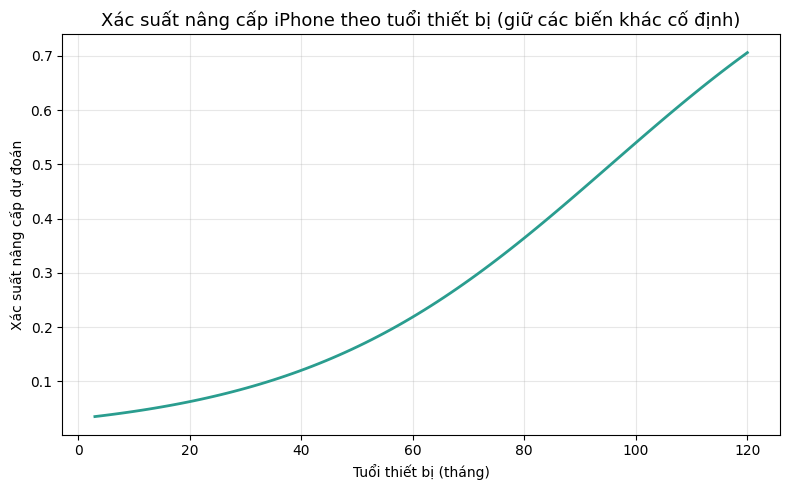

In [ ]:
# 1. Tạo khoảng giá trị cho tuổi thiết bị
device_range = np.linspace(df["device_age_months"].min(), df["device_age_months"].max(), 100)

# 2. Tạo DataFrame mẫu (các biến khác giữ trung bình)
sample = pd.DataFrame({
    "device_age_months": device_range,
    "expected_price_usd": df["expected_price_usd"].mean(),
    "trade_in_value_usd": df["trade_in_value_usd"].mean(),
    "income_usd_monthly": df["income_usd_monthly"].mean(),
    "budget_stretch_pct": df["budget_stretch_pct"].mean()
})

# 🔧 3. Đảm bảo đúng thứ tự cột như khi fit scaler
feature_order = X_train.columns.tolist()
sample = sample[feature_order]

# 4. Chuẩn hoá và dự đoán xác suất
sample_scaled = scaler.transform(sample)
pred_probs = model.predict_proba(sample_scaled)[:, 1]

# 5. Vẽ biểu đồ
plt.figure(figsize=(8,5))
sns.lineplot(x=device_range, y=pred_probs, color="#2A9D8F", linewidth=2)
plt.title("Xác suất nâng cấp iPhone theo tuổi thiết bị (giữ các biến khác cố định)", fontsize=13)
plt.xlabel("Tuổi thiết bị (tháng)")
plt.ylabel("Xác suất nâng cấp dự đoán")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()